In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_new.csv')
df

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

In [4]:
df.shape

(20800, 6)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


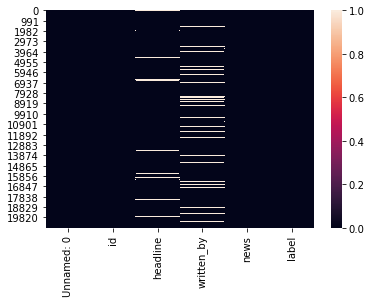

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.skew()

Unnamed: 0    0.0000
id            0.0000
label        -0.0025
dtype: float64

In [10]:
df

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

In [13]:
df=df.drop(["Unnamed: 0","headline","written_by","news"],axis=1)

In [14]:
df

id  label
0       9653      0
1      10041      0
2      19113      0
3       6868      0
4       7596      1
...      ...    ...
20795   5671      1
20796  14831      1
20797  18142      1
20798  12139      0
20799  15660      0

[20800 rows x 2 columns]

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
data=df[(z<3).all(axis=1)]
data

(array([], dtype=int64), array([], dtype=int64))


id  label
0       9653      0
1      10041      0
2      19113      0
3       6868      0
4       7596      1
...      ...    ...
20795   5671      1
20796  14831      1
20797  18142      1
20798  12139      0
20799  15660      0

[20800 rows x 2 columns]

In [16]:
data.shape

(20800, 2)

In [17]:
df_x=data.drop(columns=['label'])
y=pd.DataFrame(data['label'])
x=pd.DataFrame(df_x)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [19]:
print(x_train.shape, '\t', x_test.shape)
print(y_train.shape, '\t', y_test.shape)

(14560, 1) 	 (6240, 1)
(14560, 1) 	 (6240, 1)


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    print(m.fit(x_train,y_train))
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("accuracy score",accuracy_score(y_test,predm))
    print("confusion matrix",confusion_matrix(y_test,predm))
    print("classification report",classification_report(y_test,predm))
    print("*********************************************")
    print("\n")

LogisticRegression()
accuracy score 0.5030448717948718
confusion matrix [[   0 3101]
 [   0 3139]]
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3101
           1       0.50      1.00      0.67      3139

    accuracy                           0.50      6240
   macro avg       0.25      0.50      0.33      6240
weighted avg       0.25      0.50      0.34      6240

*********************************************


DecisionTreeClassifier()
accuracy score 0.5001602564102564
confusion matrix [[1528 1573]
 [1546 1593]]
classification report               precision    recall  f1-score   support

           0       0.50      0.49      0.49      3101
           1       0.50      0.51      0.51      3139

    accuracy                           0.50      6240
   macro avg       0.50      0.50      0.50      6240
weighted avg       0.50      0.50      0.50      6240

*********************************************


Gaus

In [21]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(x_train,y_train)
    svcscores=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print(m)
    print('score',svcscores)
    print('mean score',svcscores.mean(),'std',svcscores.std())
    print('***********************************************************')

LogisticRegression()
score [0.50048077 0.50048077 0.50072115 0.50072115 0.50072115]
mean score 0.5006250000000001 std 0.00011776392994152573
***********************************************************
DecisionTreeClassifier()
score [0.49639423 0.49495192 0.49350962 0.49855769 0.48990385]
mean score 0.4946634615384616 std 0.002906169473020664
***********************************************************
GaussianNB()
score [0.49350962 0.49326923 0.496875   0.49134615 0.50096154]
mean score 0.49519230769230765 std 0.003389337833079725
***********************************************************
KNeighborsClassifier()
score [0.49471154 0.50985577 0.49783654 0.49927885 0.49711538]
mean score 0.49975961538461533 std 0.005259975729464561
***********************************************************
SVC()
score [0.50168269 0.49302885 0.50625    0.49639423 0.5       ]
mean score 0.4994711538461539 std 0.004518719283657367
***********************************************************
AdaBoostClassifier

In [22]:
#GridsearchCV for Adaboost
from sklearn.model_selection import GridSearchCV
ab=AdaBoostClassifier()
parameters={'n_estimators':[400,500,600,700],'learning_rate':[1,10,0.1]}
clf=GridSearchCV(ab,parameters)
clf.fit(x,y)
print('best parameters',clf.best_params_)

best parameters {'learning_rate': 0.1, 'n_estimators': 700}


In [23]:
#GridsearchCV for Gradientboost
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingClassifier()
parameters={'criterion':['friedman_mse','mse','mae']}
clf=GridSearchCV(gb,parameters)
clf.fit(x,y)
print('best parameters',clf.best_params_)

best parameters {'criterion': 'mae'}


In [29]:
abc=AdaBoostClassifier(n_estimators=700,learning_rate=0.1,random_state=40)
abc.fit(x_train,y_train)
print("score",abc.score(x_train,y_train))
predm=abc.predict(x_test)
print("accuracy score",accuracy_score(y_test,predm))
print("confusion matrix",confusion_matrix(y_test,predm))
print("classification report",classification_report(y_test,predm))

score 0.5275412087912088
accuracy score 0.5009615384615385
confusion matrix [[1693 1408]
 [1706 1433]]
classification report               precision    recall  f1-score   support

           0       0.50      0.55      0.52      3101
           1       0.50      0.46      0.48      3139

    accuracy                           0.50      6240
   macro avg       0.50      0.50      0.50      6240
weighted avg       0.50      0.50      0.50      6240



In [30]:
cm=confusion_matrix(y_test,predm)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("confusion Matrix")
plt.show()

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=abc.predict_proba(x_test)[:,1]
print(y_pred_prob)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LR')

[0.50082867 0.49981731 0.50017945 ... 0.50082867 0.50000028 0.50029642]


In [32]:
auc_score=roc_auc_score(y_test,abc.predict(x_test))
print(auc_score)


0.5012338660241653


In [33]:
import joblib
joblib.dump(abc,'fakenew.pkl')

['fakenew.pkl']